In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Product Sales Analysis\sales_data_sample.csv', encoding='ISO-8859-1')

df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


## Inspecting & Preparing Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [35]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [36]:
# I will rename the columns to be lowercase for easier access
df.columns = df.columns.str.lower()
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [37]:
# Check for missing values
df.isnull().sum()

ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

-   I noticed that the territory column missing values based on the country column are for USA and Canada. To handle these missing values we're going to map territory column based on the country column.

In [38]:
# define the mapping of countries to territories
territory_mapping = {
    "USA": "North America",
    "Spain": "EMEA",
    "France": "EMEA",
    "Australia": "APAC",
    "UK": "EMEA",
    "Italy": "EMEA",
    "Finland": "EMEA",
    "Norway": "EMEA",
    "Singapore": "APAC",
    "Canada": "North America",
    "Denmark": "EMEA",
    "Germany": "EMEA",
    "Sweden": "EMEA",
    "Austria": "EMEA",
    "Japan": "Japan",
    "Belgium": "EMEA",
    "Switzerland": "EMEA",
    "Philippines": "APAC",
    "Ireland": "EMEA"
}

# replace missing values in 'territory' column based on 'country'
df['territory'] = df['country'].map(territory_mapping)

#df.isna().sum()

In [39]:
# also I will replace the missing values in state column with 'Unknown'
df['state'].fillna('Unknown', inplace=True)
# and I will replace the missing values in postal code column with '00000'
df['postalcode'].fillna('00000', inplace=True)

In [40]:
df.isna().sum()

ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state                  0
postalcode             0
country                0
territory              0
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

In [41]:
# check for duplicates
df.duplicated().sum()

0

In [42]:
# drop columns that are not needed for analysis
columns_to_drop = ['phone', 'addressline1', 'addressline2', ]
df.drop(columns=columns_to_drop, inplace=True)

In [43]:
# converting the order date to datetime
df['orderdate'] = pd.to_datetime(df['orderdate'])
# then I will extract the name of the month 
df['month'] = df['orderdate'].dt.month_name()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ordernumber       2823 non-null   int64         
 1   quantityordered   2823 non-null   int64         
 2   priceeach         2823 non-null   float64       
 3   orderlinenumber   2823 non-null   int64         
 4   sales             2823 non-null   float64       
 5   orderdate         2823 non-null   datetime64[ns]
 6   status            2823 non-null   object        
 7   qtr_id            2823 non-null   int64         
 8   month_id          2823 non-null   int64         
 9   year_id           2823 non-null   int64         
 10  productline       2823 non-null   object        
 11  msrp              2823 non-null   int64         
 12  productcode       2823 non-null   object        
 13  customername      2823 non-null   object        
 14  city              2823 n

In [45]:
#df.to_csv(r'C:\Users\Mohamed Fawzi\Desktop\Product Sales Analysis\sales_data_cleaned.csv', index=False)

## Time Series Analysis:

### Monthly Sales Trend

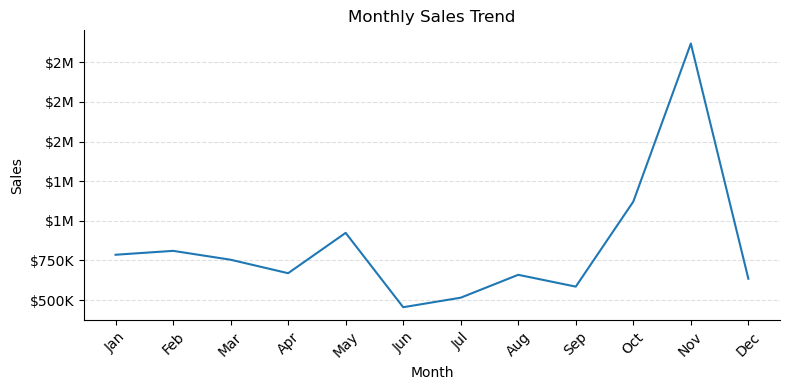

In [46]:
monthly_trend = df.groupby('month')['sales'].sum().reset_index().round(2)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')
# convert month names to abbreviations to make the plot cleaner
monthly_trend['month'] = monthly_trend['month'].str[:3]


plt.figure(figsize=(8, 4))
sns.lineplot(
    data=monthly_trend, 
    x='month', 
    y='sales', 
    palette='viridis'
    )

def currency(x, pos):
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)
    
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()


- The sales performance across the year shows **significant variation**, indicating potential seasonality or promotional impact.

- **Key Observations**
   1. **Strongest Month:**
      - **November** experienced the highest spike in sales, surpassing **$2M**.
      - This likely corresponds with **seasonal promotions** such as Black Friday or early holiday shopping.

   2. **Second Strongest Month:**
      - **October** also shows a notable increase in sales, over **$1M**, suggesting the buildup to peak season begins early.

   3. **Weakest Month:**
      - **June** marked the lowest sales point, just below **$500K**.
      - This may indicate a **mid-year slump**, potentially due to lower consumer spending or limited marketing activities.

   4. **Consistent Performance:**
      - Sales remained relatively stable between **January and May**, ranging around **$700K–$900K**.
      - Indicates a **moderate baseline** level of activity in the first half of the year.

   5. **Sudden Drop in December:**
      - After peaking in November, **sales dropped sharply in December**, down to levels similar to early in the year.
      -----------

###  Quarterly & Yearly Trend

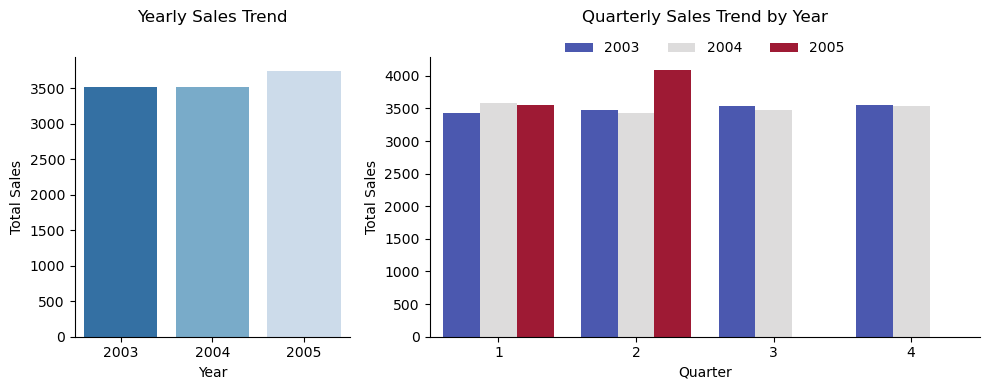

In [47]:
qrt_yr_trend = df.groupby(['year_id', 'qtr_id'])['sales'].sum().reset_index()


import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])  # Adjust width ratios

# Yearly Sales Trend (smaller)
ax0 = fig.add_subplot(gs[0])
sns.barplot(data=df, x='year_id', y='sales', ax=ax0, palette='Blues_r', ci=False)
ax0.set_title("Yearly Sales Trend", pad=25)
ax0.set_xlabel("Year")
ax0.set_ylabel("Total Sales")

# Quarterly Sales Trend (larger)
ax1 = fig.add_subplot(gs[1])
sns.barplot(data=df, x='qtr_id', y='sales', hue='year_id', ax=ax1, palette='coolwarm', ci=False)
ax1.set_title("Quarterly Sales Trend by Year", pad=25)
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Total Sales")
ax1.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.1), frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

- **Yearly Sales Trend (2003–2005)**
  - **2003 and 2004** had nearly identical total sales, both around **$3,500**.
  - **2005** showed a slight improvement in total sales, crossing the **$3,700** mark.
  - Indicates a **steady but modest growth** trend over the 3-year period.

- **Quarterly Sales Trend by Year**
  - **Quarter 1**:
    - All three years performed well.
    - **2005** leads slightly, showing a strong start to the year.
  
  - **Quarter 2**:
    - **2005** significantly outperformed previous years, with the **highest single-quarter performance** across all years.
    - Both 2003 and 2004 maintained similar levels to Quarter 1.

  - **Quarter 3**:
    - Sales remained steady for all years, with minimal variation.
    - Suggests consistent performance during mid-year months.

  - **Quarter 4**:
    - Very similar sales values across all years.
    - Indicates **stable end-of-year sales**, possibly driven by recurring seasonal patterns.

-----

In [48]:
df_advanced = df.copy() # Create a copy of the original DataFrame for advanced analysis
# Convert 'orderdate' to datetime format
df_advanced['orderdate'] = pd.to_datetime(df_advanced['orderdate'])

In [49]:
# Resample data to daily/weekly/monthly level for trend analysis
df_advanced.set_index('orderdate', inplace=True)
monthly_sales = df_advanced['sales'].resample('M').sum()

- Now let's analyze the monthly sales trends and their 3-month rolling average, which will help to identify trends in noisy data.

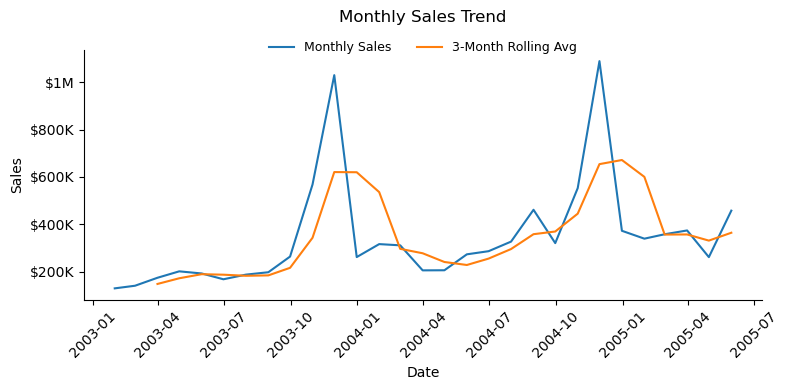

In [50]:
rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(8, 4))

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, label='Monthly Sales')
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label='3-Month Rolling Avg')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency)) # function definied earlier...

plt.title('Monthly Sales Trend', pad=20)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(ncols=2, fontsize=9, loc='upper center', bbox_to_anchor=(0.5, 0, 0, 1.08), frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

- The chart visualizes monthly sales from **2003 to mid-2005** alongside a **3-month rolling average**, which smooths short-term fluctuations.

-  **Key Observations**

   1. **Seasonal Peaks**:
      - Major sales spikes are seen at the **end of each year**:
      - **Late 2003** and **late 2004** both show sharp peaks exceeding **$1M**.
      - These may correlate with **holiday seasons or end-of-year promotions**.

   2. **Rolling Average Smoothing**:
      - The **3-month rolling average** clearly highlights **underlying trends**, removing noise from monthly fluctuations.
      - Peaks in the rolling average lag slightly behind actual monthly spikes, as expected with smoothing.

   3. **Post-Peak Drop-offs**:
      - Following each year-end spike, there’s a **notable sales decline** in the first quarter.
      - Indicates a **post-holiday slump**, consistent with reduced consumer demand after major sales periods.

   4. **Mid-Year Stability**:
      - Sales during **mid-year months (Q2 and Q3)** show **relatively stable or modest growth**, with smaller fluctuations compared to year-end.

   ------



- Now, let's perform a seasonal decomposition of monthly sales using a multiplicative model to break it into 4 components, **Observes**, **Trend**, **Seasonal**, and **Residual**:
    -   **Observed** : The raw monthly sales values.
    -   **Trend** : Long-term movement in sales.
    -   **Seasonal** : Repeating patterns within a year.
    -   **Residuals** : Random noise or unexplained variability.

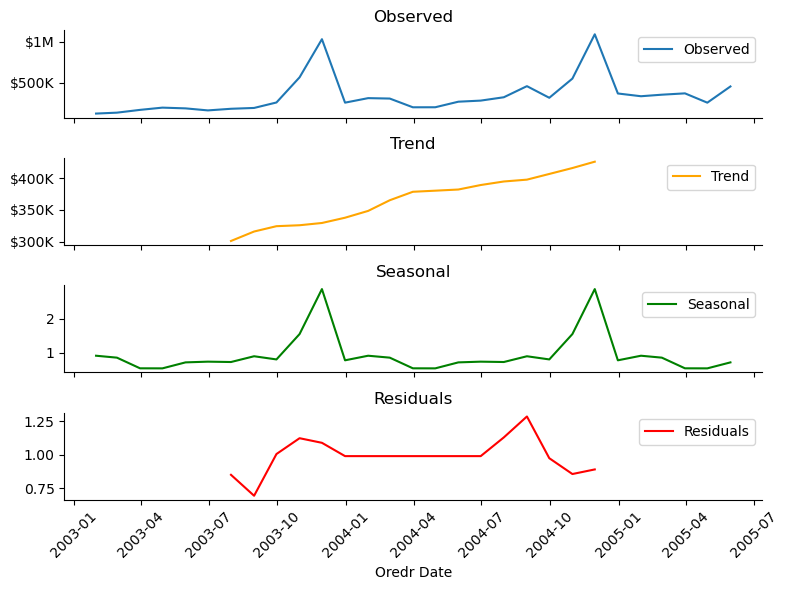

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(monthly_sales, model='multiplicative')

fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=axes[0], label='Observed')
axes[0].set_title('Observed')

sns.lineplot(x=result.trend.index, y=result.trend.values, ax=axes[1], label='Trend', color='orange')
axes[1].set_title('Trend')

sns.lineplot(x=result.seasonal.index, y=result.seasonal.values, ax=axes[2], label='Seasonal', color='green')
axes[2].set_title('Seasonal')

sns.lineplot(x=result.resid.index, y=result.resid.values, ax=axes[3], label='Residuals', color='red')
axes[3].set_title('Residuals')

axes[0].yaxis.set_major_formatter(FuncFormatter(currency))
axes[1].yaxis.set_major_formatter(FuncFormatter(currency))

plt.xlabel('Oredr Date')
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()


-   **Key Insights**:
This decomposition breaks down monthly sales into four components: **Observed**, **Trend**, **Seasonal**, and **Residuals**.

    - Observed
        - The raw sales data shows clear **spikes in late 2003 and late 2004**, crossing **$1M**.
        - Reflects **sharp seasonal patterns** with significant peaks and dips, consistent with earlier monthly sales trend findings.

    - Trend
        - A steady upward movement is seen from **early 2003 to mid-2005**.
        - The **trend component gradually increases**, rising from just above **$300K** to over **$400K**, suggesting **long-term growth** in sales performance.

    - Seasonal
        - Shows a repeating **seasonal structure**, with **notable spikes** aligning with end-of-year months (likely Q4).
        - Seasonal values occasionally exceed **2x the baseline**, emphasizing the strong **seasonality effect** on total sales.

    - Residuals
        - Residuals mostly hover between **0.75 and 1.25**, indicating **relatively low variance** beyond seasonality and trend.
        - A few brief periods (e.g., around **late 2004**) show higher residuals, suggesting **unexpected deviations**, possibly due to one-time events or promotions.



----------

## Product Performance Analysis:

-   Now, we'll analyze the products line performance by sales

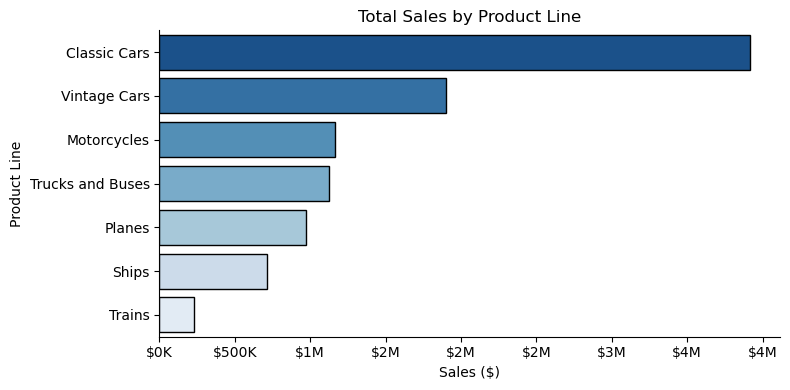

In [52]:
product_sales = df.groupby('productline')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=product_sales,
    x='sales',
    y='productline',
    palette='Blues_r',
    edgecolor='black'
)

def currency(x, pos):
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)

plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Total Sales by Product Line',)
plt.xlabel('Sales ($)',) 
plt.ylabel('Product Line',)

sns.despine()
plt.tight_layout()
plt.show()


-   **Key Insights:**
    -   This horizontal bar chart shows the total sales by product line, highlighting the best and worst-performing categories.

    -   Top Performing Product Lines
        - **Classic Cars** dominate with sales near **$4M**, accounting for a significant portion of total revenue.
        - **Vintage Cars** follow at a distant second with just under **$2M** in sales.

    -   Mid-Tier Product Lines
        - **Motorcycles** and **Trucks and Buses** perform similarly, each generating around **$1.3M**.
        - **Planes** also show solid performance with approximately **$1M** in total sales.

    -   Low Performing Product Lines
        - **Ships** show moderate performance, falling below $1M.
        - **Trains** contribute the least, with sales below **$500K**.
    ----


-   Let's explore the relationship between **Unit Price** and **Quantity**

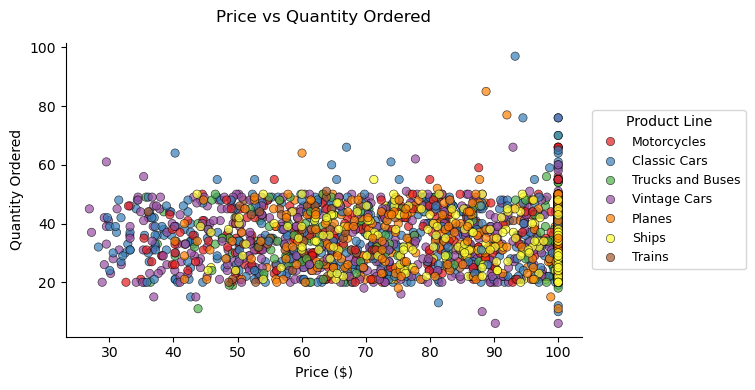

In [53]:
# Price vs Quantity Ordered
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x='priceeach',
    y='quantityordered',
    hue='productline',
    palette='Set1',
    alpha=0.7,
    edgecolor='black',
)


plt.title('Price vs Quantity Ordered', pad=15)
plt.xlabel('Price ($)')
plt.ylabel('Quantity Ordered')

plt.legend(title='Product Line', loc='center right', bbox_to_anchor=(1.08, 0.0, 0.25, 1.0), fontsize=9)

sns.despine()
plt.tight_layout()
plt.show()

-   This scatter plot explores the relationship between **unit price** and **quantity ordered** across various product lines.

- **Observations:**

    -   Price Range
        - Prices span from **$30 to $100**, with a noticeable **cluster near the $100 mark**, likely due to premium products (e.g., **Classic Cars**).

    -   Quantity Ordered
        - Most orders fall between **20 and 50 units**, regardless of price.
        - A few outliers show quantities exceeding **80–100 units**, particularly around the **$90–$100** range.

    -   Distribution by Product Line
        - The plot shows **no strong negative correlation** between price and quantity, which suggests:
        - Customers are **still ordering high-priced items** in reasonable quantities.

    -   Product Line Highlights
        - **Classic Cars** and **Vintage Cars** appear frequently in the high-price range ($90–$100), reinforcing their revenue dominance.
        - **Motorcycles** and **Trucks and Buses** span a wide price range, showing **diverse product offerings**.
        - **Trains** and **Ships** are less dense in the plot, supporting earlier insights on lower sales.

        -----




## Customer Analysis:

-   We'll analyze **Top Customer** by **Sales**

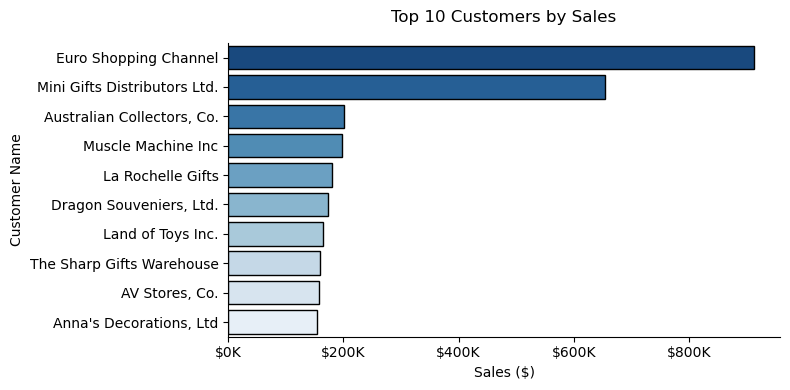

In [54]:
# top 10 customer by sales
top_customer = df.groupby('customername')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_customer,
    x='sales',
    y='customername',
    palette='Blues_r',
    edgecolor='black'
)
def currency(x, pos):
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)
    
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Top 10 Customers by Sales', pad=15)
plt.xlabel('Sales ($)')
plt.ylabel('Customer Name')

sns.despine()
plt.tight_layout()
plt.show()

-   This horizontal bar chart displays the top 10 customers ranked by total sales volume.

-   **Key Insights:**

-   Highest Revenue Contributors
    - **Euro Shopping Channel** leads by a wide margin, generating nearly **$900K+** in sales.
    - **Mini Gifts Distributors Ltd.** is second, contributing approximately **$700K+**.

-   Sales Drop-Off
    - There’s a significant gap between the **top 2 customers** and the remaining ones.
    - Other top customers such as **Australian Collectors, Co.**, **Muscle Machine Inc**, and **La Rochelle Gifts** cluster around the **$200K mark**.

-   Long Tail
    - The bottom 5 of the top 10 still represent key business, each bringing in **$150K–$200K**, suggesting a moderately strong mid-tier customer base.
--------

-  Let's see how frequently customers place orders by plotting the distribution of counts per customer

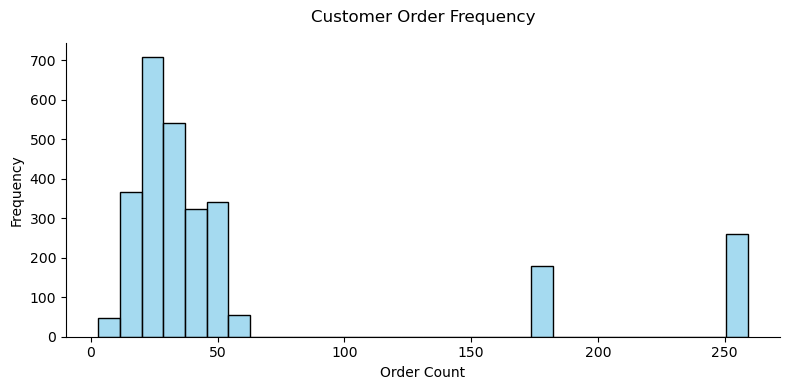

In [55]:
# Order Frequency
order_frequency = df['customername'].value_counts().reset_index()
order_frequency.columns = ['customername', 'order_count']
plt.figure(figsize=(8, 4))
sns.histplot(
    data=order_frequency,
    x='order_count',
    bins=30,
    color='skyblue',
    edgecolor='black',
    weights='order_count',

)

plt.title('Customer Order Frequency', pad=15)
plt.xlabel('Order Count')
plt.ylabel('Frequency')

sns.despine()
plt.tight_layout()
plt.show()

-   This histogram shows the distribution of customers based on how many orders they've placed.

**Key Observations:**

-   Majority of Customers
    - Most customers placed between **20 and 60 orders**, with the **peak frequency around 30 orders**.
    - These customers make up the **bulk of the customer base**, representing typical purchasing behavior.

-   Outliers
    - A small number of customers placed **extremely high numbers of orders**, with clear outliers at:
    - ~**175 orders**
    - ~**250 orders**
    - These may represent **VIP customers, resellers, or subscription accounts**.

-   Distribution Shape
    - The distribution is **right-skewed**, suggesting that while most customers place a moderate number of orders, a few place significantly more.
-----

## Geographical Analysis Analysis:

-   Let's see Top 10 coutries by Sales

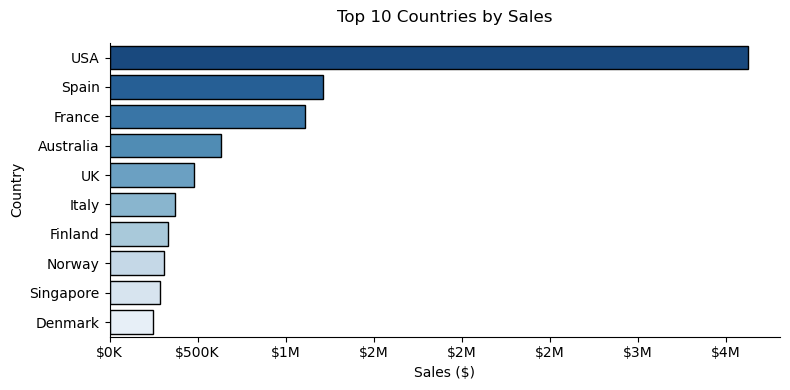

In [56]:
# Sales by Country
sales_by_country = df.groupby('country')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=sales_by_country,
    x='sales',
    y='country',
    palette='Blues_r',
    edgecolor='black'
)

def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)
    
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Top 10 Countries by Sales', pad=15)
plt.xlabel('Sales ($)')
plt.ylabel('Country')

sns.despine()
plt.tight_layout()
plt.show()

-   **Key Highlights:**

-   Top Contributor
    - **🇺🇸 USA** dominates with over **$4M in sales**, far ahead of all other countries.
    - This makes it the **primary market** and a crucial driver of revenue.

-   Other Strong Performers
    - **🇪🇸 Spain** and **🇫🇷 France** follow, each generating more than **$1M** in sales.
    - They represent significant but secondary markets.

-   Mid-Tier Markets
    - **🇦🇺 Australia** and **🇬🇧 UK** show moderate sales volumes (~$500K–$800K).
    - These may benefit from targeted growth strategies.

-   Long-Tail Countries
    - Countries like **Italy**, **Finland**, **Norway**, **Singapore**, and **Denmark** show lower sales figures (< $500K).
    - These markets may require localization, awareness campaigns, or partner distribution strategies.
-----

-   Now, let's see how sales performance varies across territories based on the deal size categories:

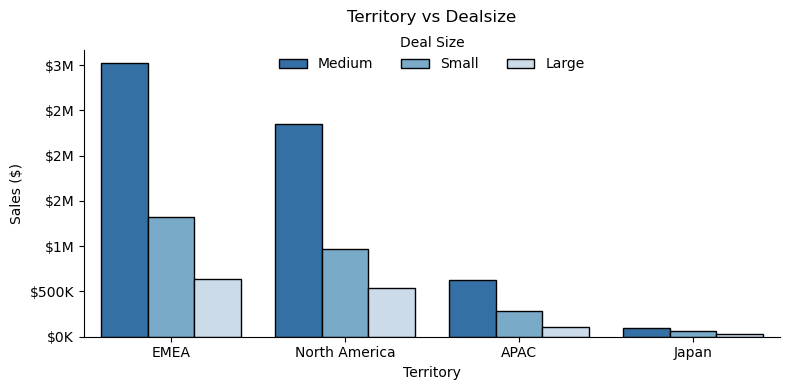

In [57]:
# Territory vs Deal Size
territory_dealsize = df.groupby(['territory', 'dealsize'])['sales'].sum().reset_index()
territory_dealsize.sort_values(by='sales', ascending=False, inplace=True)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=territory_dealsize,
    x='territory',
    y='sales',
    hue='dealsize',
    palette='Blues_r',
    edgecolor='black'
)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency)) # the same currency function as above

plt.title('Territory vs Dealsize', pad=20)
plt.xlabel('Territory')
plt.ylabel('Sales ($)')
plt.legend(title='Deal Size', loc='upper center', ncols=3, frameon=False, bbox_to_anchor=(0, 0.0, 1, 1.09))

sns.despine()
plt.tight_layout()
plt.show()

-   **Insights:**

-   EMEA (Europe, Middle East & Africa)
    - **Highest overall sales**: Over **$5M** total.
    - **Medium-sized deals** dominate (~$3M), followed by Small and Large.
    - Suggests strong mid-market presence and upsell potential.

-   North America
    - Total sales ~**$4M**, with a similar pattern to EMEA.
    - Medium deals lead, followed by Small, then Large.
    - Comparable to EMEA but slightly lower across all deal sizes.

-   APAC (Asia-Pacific)
    - Noticeably lower sales (~$1.2M).
    - Still, Medium deals are the largest segment.
    - Potential growth territory; might benefit from more regional focus.

-   Japan
    - Very small market footprint (~$100K total).
    - All deal sizes contribute marginally.
    - Requires strategic decisions: invest or maintain minimal presence.
--------

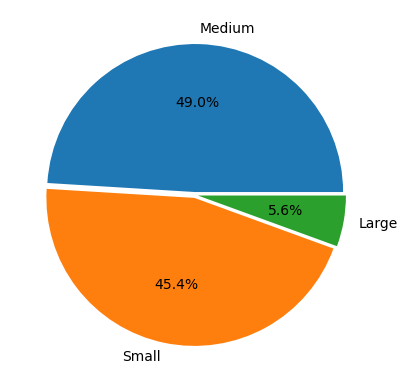

In [58]:
# Deal Size Distribution
dealsize_dist = df['dealsize'].value_counts().reset_index()
dealsize_dist.columns = ['status', 'count']


plt.figure(figsize=(8, 4))
plt.pie(
    dealsize_dist['count'],
    labels=dealsize_dist['status'],
    autopct='%1.1f%%',
    explode=(0.02, 0.02, 0.02),

)

plt.tight_layout()
plt.show()

### Deal Size Distribution

This pie chart illustrates the **proportion of total deals** by size category.

- **Medium Deals**: **49.0%**  
  → Nearly **half** of all deals fall into this category.  
  → Core revenue driver and the most consistent segment.

- **Small Deals**: **45.4%**  
  → Also a **significant contributor**, slightly below medium deals.  
  → Indicates a healthy volume of transactions, possibly with lower individual value.

- **Large Deals**: **5.6%**  
  → A **small but notable share**.  
  → These may represent strategic accounts with high individual value but low frequency.

--------

In [59]:
# Group by country and calculate average deal size
geo_analysis = df.groupby('country').agg({
    'sales': 'sum',
    'ordernumber': 'nunique',
    'dealsize': lambda x: x.value_counts(normalize=True)['Small']  # % of small deals
}).reset_index()

# Visualize using geospatial plots
import plotly.express as px
fig = px.choropleth(
    geo_analysis,
    locations='country',
    locationmode='country names',
    color='sales',
    hover_name='country',
    title='Total Sales by Country',
    width=800,
    height=500,
)
fig.show()

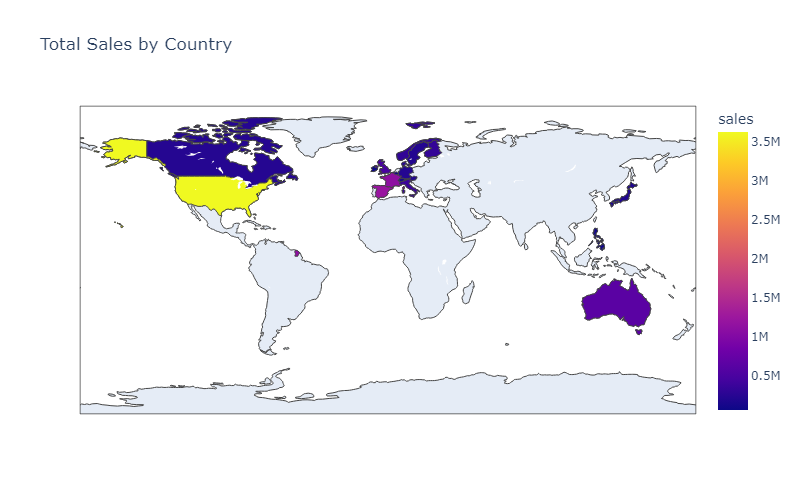

This choropleth map visually represents **total sales distribution** across various countries.

### Key Highlights:

- **Top Performing Countries**:
  - 🇺🇸 **USA**: Highest sales volume, indicated by **bright yellow**.  
  - 🇪🇸 **Spain**: Among the top, with strong sales in **lighter shades**.  
  - 🇫🇷 **France**, 🇬🇧 **UK**, 🇦🇺 **Australia**: Also notable contributors.

- **Mid-range Performers**:
  - **Northern and Western Europe**: Countries like **Finland, Norway, and Italy** show **moderate sales**.  
  - 🇨🇦 **Canada**: Noteworthy performance in **North America**.

- **Lower Sales Regions**:
  - Some parts of **Asia** and **South America** show **limited or no activity**, indicating potential markets for future expansion.

-----

## Order Status Analysis:

-  Now I will use pie chart to show the proportion of each order status relative to the total number of orders. This will help us to understand the current state of orders such as how many are shipped, pending or cancelled.

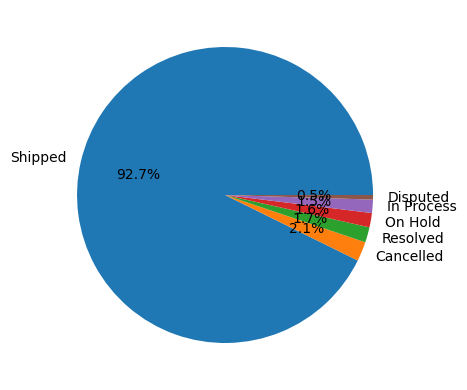

In [60]:
# Status Distribution
status_distribution = df['status'].value_counts().reset_index()
#status_distribution.columns = ['status', 'count']

plt.figure(figsize=(8, 4))
plt.pie(
    status_distribution['count'],
    labels=status_distribution['status'],
    autopct='%1.1f%%',

)

plt.tight_layout()
plt.show()


- **Key Findings:**

  - **Shipped**:  
    - Dominates the distribution with **92.7%** of all orders.  
    - Indicates highly efficient fulfillment and delivery processes.

  - **Other Statuses**:  
    - **Cancelled**: ~2.1% — relatively low, suggesting good order accuracy.  
    - **Resolved**: ~1.1% — issues addressed effectively.  
    - **On Hold**: ~1.0% — potential minor delays or pending issues.  
    - **In Process**: ~1.5% — active handling of some orders.  
    - **Disputed**: ~0.5% — minimal disputes, reflecting customer satisfaction.

-----

-   Now, I want to see the total revenue is actually realized versus how much is tied up in orders that may be at risk of cancellation or dispute.

In [61]:
sales_by_status = df.groupby('status')['sales'].sum().reset_index()
sales_by_status = sales_by_status.sort_values(by='sales', ascending=False)

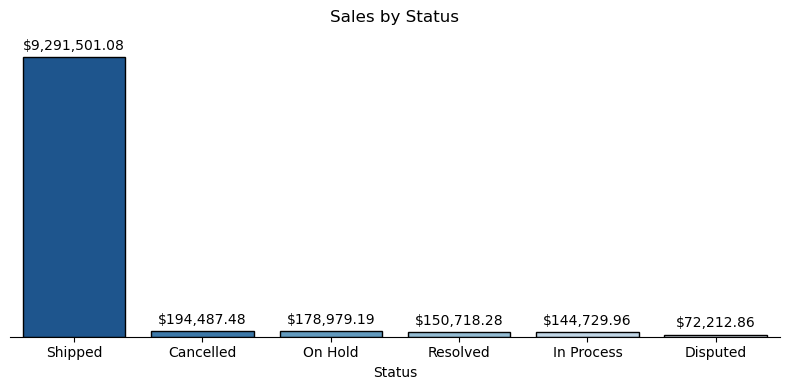

In [62]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(
    data=sales_by_status,
    x='status',
    y='sales',
    palette='Blues_r',
    edgecolor='black'
)

#plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

for container in ax.containers:
    labels = [f'${float(v.get_height()):,}' for v in container]
    ax.bar_label(container, labels=labels, padding=3)


plt.title('Sales by Status', pad=15)
plt.xlabel('Status')
ax.set_yticks([])  # Removes y-ticks
plt.ylabel('')

sns.despine(left=True)
plt.tight_layout()
plt.show()


-   **Insights:**

    - **Shipped orders dominate revenue**, confirming a **well-functioning sales pipeline**.
    - The relatively **small financial impact** from **Cancelled** and **Disputed** orders suggests **low revenue leakage** due to operational or customer service issues.
    - Continued monitoring of **On Hold** and **In Process** orders is advisable to avoid potential delays in revenue recognition.

    -----

## Correlation:

-   Now I will generate a correlation heatmap showing the relationships between the price of each unit, the orders quantity, and sales to see how strongly each pair is related.

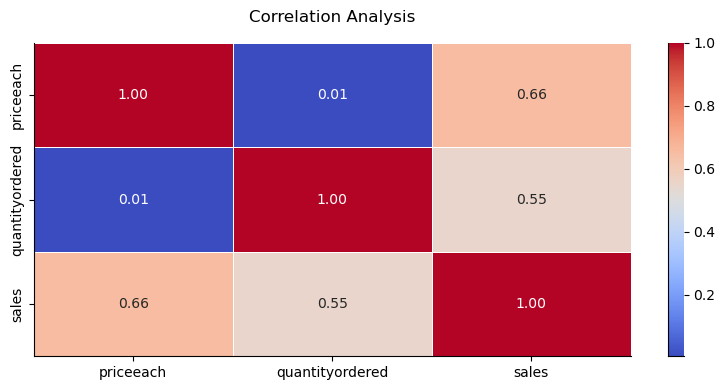

In [63]:
numerical_columns = ['priceeach', 'quantityordered', 'sales']
plt.figure(figsize=(8, 4))
sns.heatmap(
    data=df[numerical_columns].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt='.2f',
)

plt.title('Correlation Analysis', pad=15)

sns.despine()
plt.tight_layout()
plt.show()

-   This heatmap illustrates the **strength and direction of linear relationships** between key sales variables.

-   Key Correlation Values:

    | Variable Pair                | Correlation |
    | ---------------------------- | ----------- |
    | **Price Each ↔ Sales**       | **0.66** → **moderate positive** relationship. Higher unit prices generally lead to higher total sales.
    | **Quantity Ordered ↔ Sales** | **0.55** → **moderate positive** relationship. Larger order quantities contribute to greater sales.
    | **Price Each ↔ Quantity Ordered** | **0.01** → **no correlation**. Product price does not significantly influence quantity ordered.

-   Insights:

    - **Sales are driven by both price and quantity**, but **price** has a **slightly stronger impact**.
    - The **lack of correlation** between **price** and **quantity ordered** suggests that **purchasing decisions** might be **price inelastic** — customers buy similar quantities regardless of price changes.
    - Marketing strategies could focus on **bundling or volume incentives** to leverage the moderate quantity-sales relationship.

---
